In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 12 20:42:14 2022

@author: Fred Coerver
"""
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import sys
import os
import datetime
import time
import matplotlib as plt
from matplotlib import pyplot as plt
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
pd.options.display.float_format = '{:,.6f}'.format

#Userdefined module
from fad_v03 import Get_SandD

######################### READ DATA #################################################

td = pd.read_excel("./Testdata_inout2.xlsx",sheet_name="inputdata",usecols="B:C")


In [2]:
cwd = os.getcwd()
cwd

'C:\\Users\\Fred_Miriam\\anaconda\\Lib\\ML_data\\Fast-Anomaly-Detection-main'

In [3]:
td[td["x-value"]==3.25]

,x-value,y-value
61,3.250000,-14.649595


In [32]:
writer = pd.ExcelWriter("./Testdata.xlsx")
######################### INITIALIZE DATA   #########################################
kpi_input = td.columns.to_list()
t=1
P1inc= 10
accuracy = 10
window_sizeleft = 3
window_sizeright= 2
Time_scale=False
ignore_startsamples = 3
ignore_endsamples = 2
td_in = td[[kpi_input[0],kpi_input[t]]]
td_in = td

##########################  CALL MODULE   ###########################################
dfSin_gl, spikelist_gl = Get_SandD(td_in,
                                   acc=accuracy,
                                   windowsizeleft=window_sizeleft,
                                   windowsizeright=window_sizeright,
                                   sp_name=kpi_input[t],
                                   P1=P1inc,
                                   ignorestartsamples = ignore_startsamples,
                                   ignoreendsamples = ignore_endsamples,
                                   Timescale=Time_scale
                                   )

##########################    write data to excel   #################################
dfSin_gl.to_excel(writer,sheet_name="Sheet4")  
spikelist_gl.to_excel(writer,sheet_name="Sheet5") 
writer.save()
writer.close()

In [33]:
td[0:3]

,x-value,y-value,KPI_name,Regr_value,Value,Unixtime,Std,spike,spikevalue,Slope,Intercept,Diff,Regr_value_plus_std,Regr_value_min_std
0,-12.000000,3.948000,y-value,0.000000,0.000000,0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-11.750000,5.597461,y-value,0.000000,0.000000,0,1.000000,0.000000,5.597461,1.000000,1.000000,1.000000,1.000000,1.000000
2,-11.500000,6.055759,y-value,0.000000,0.000000,0,1.000000,0.000000,6.055759,1.000000,1.000000,1.000000,1.000000,1.000000


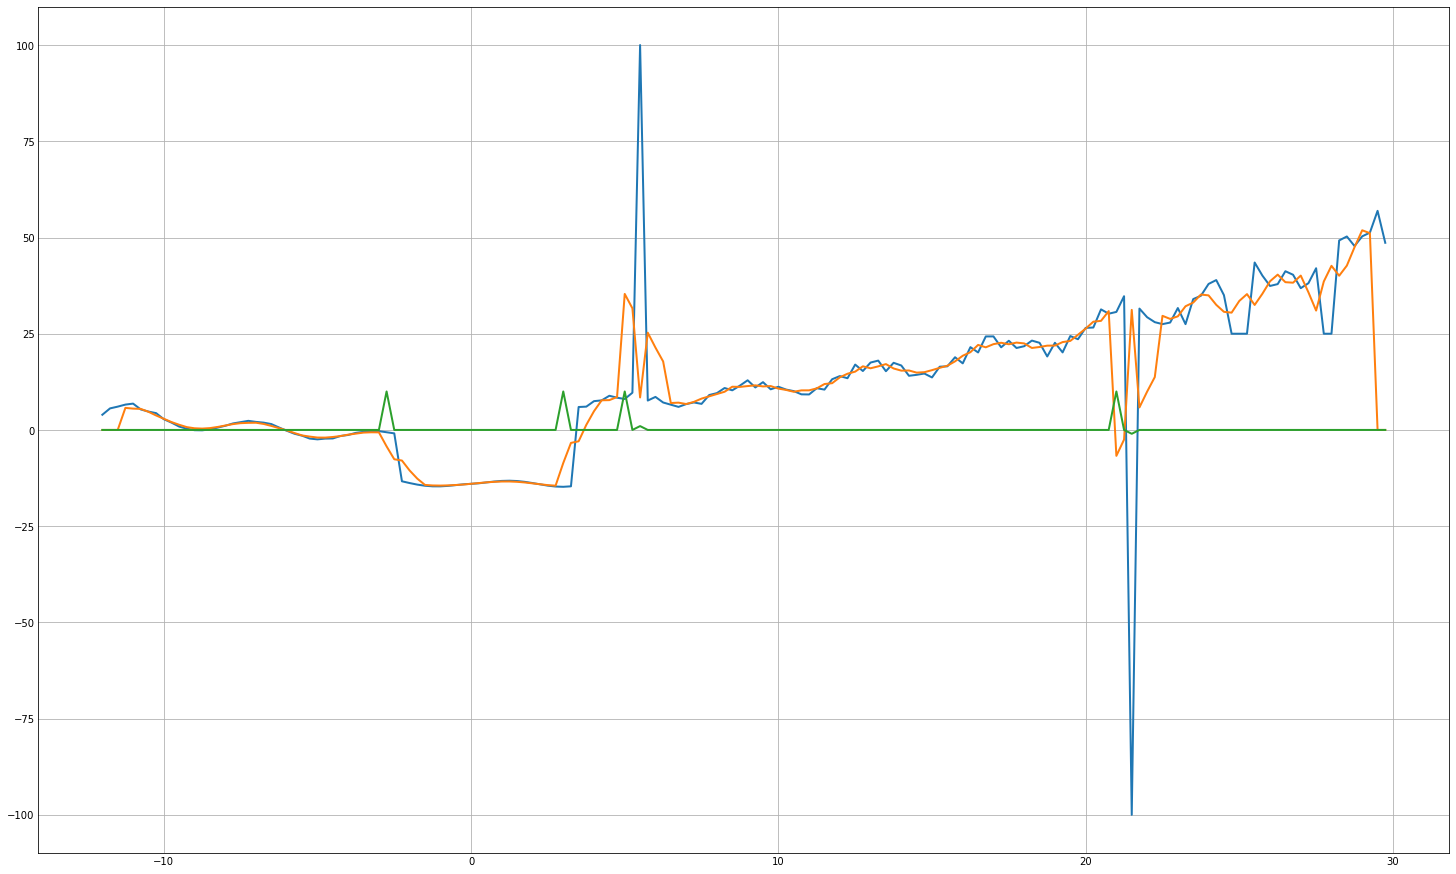

In [34]:
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(td_in["x-value"],td_in["y-value"], linewidth=2.0)
ax.plot(td_in["x-value"],td_in["Regr_value"], linewidth=2.0)
ax.plot(td_in["x-value"],td_in["spike"], linewidth=2.0)

In [7]:
td_in

,x-value,y-value,KPI_name,Regr_value,Value,Unixtime,Std,spike,spikevalue,Slope,Intercept,Diff,Regr_value_plus_std,Regr_value_min_std
0,-12.000000,3.948000,y-value,0.000000,0.000000,0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-11.750000,5.597461,y-value,0.000000,0.000000,0,1.000000,0.000000,5.597461,1.000000,1.000000,1.000000,1.000000,1.000000
2,-11.500000,6.055759,y-value,0.000000,0.000000,0,1.000000,0.000000,6.055759,1.000000,1.000000,1.000000,1.000000,1.000000
3,-11.250000,6.584491,y-value,5.424256,0.000000,0,0.893343,0.000000,6.584491,0.389211,9.802878,1.160235,12.571004,-1.722492
4,-11.000000,6.842872,y-value,5.450964,0.000000,0,0.466522,0.000000,6.842872,-1.073380,-6.356221,1.391909,9.183136,1.718792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,28.750000,47.781099,y-value,47.166396,0.000000,0,6.719207,0.000000,47.781099,14.268715,-363.059159,0.614703,100.920048,-6.587257
164,29.000000,50.302150,y-value,50.683774,0.000000,0,2.776712,0.000000,50.302150,2.139641,-11.365821,0.381624,72.897469,28.470079
165,29.250000,51.265059,y-value,0.000000,0.000000,0,1.000000,0.000000,51.265059,1.000000,1.000000,1.000000,1.000000,1.000000
166,29.500000,56.928733,y-value,0.000000,0.000000,0,1.000000,0.000000,56.928733,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
spikelist_gl

,x-value,y-value,KPI_name,Regr_value,Value,Unixtime,Std,spike,spikevalue,Slope,Intercept,Diff,Regr_value_plus_std,Regr_value_min_std
59,2.750000,-14.705220,y-value,-10.982374,0.000000,0,6.123793,30.000000,-10.982374,8.284643,-33.765141,3.722846,38.007968,-59.972715
67,4.750000,8.380881,y-value,23.625891,0.000000,0,26.422987,30.000000,23.625891,40.099101,-166.844837,15.245011,235.009788,-187.758006
70,5.500000,100.000000,y-value,8.239980,0.000000,0,0.711400,1.000000,8.239980,-0.671131,11.931199,91.760020,13.931183,2.548777
131,20.750000,30.198924,y-value,8.311800,0.000000,0,39.571500,30.000000,8.311800,-51.992567,"1,087.157557",21.887124,324.883801,-308.260201
134,21.500000,-100.000000,y-value,30.740391,0.000000,0,1.869011,-1.000000,30.740391,-1.792058,69.269643,130.740391,45.692476,15.788306


In [9]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import (
    LinearRegression,
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor,
)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(td["x-value"], td["y-value"], test_size=0.2, random_state=42)

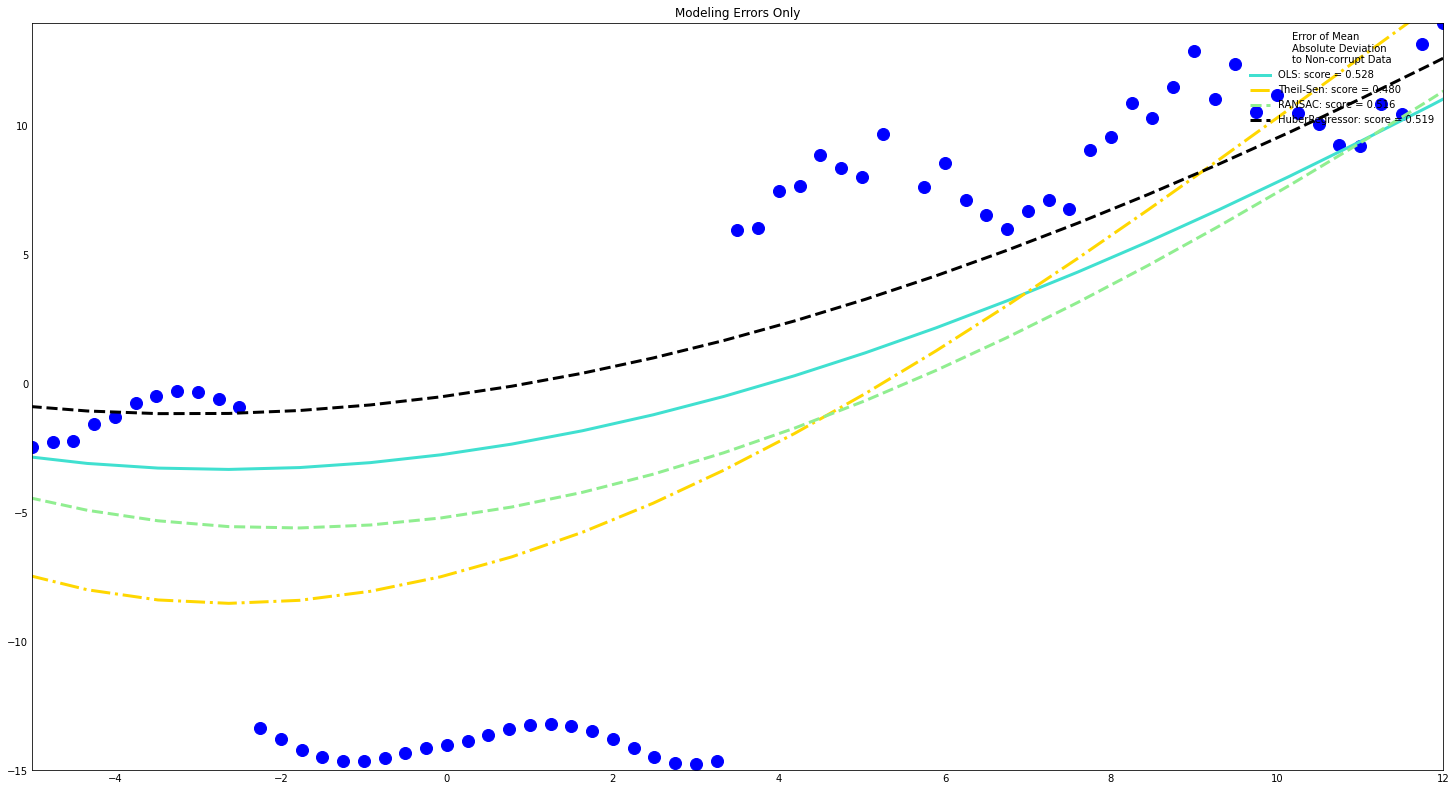

In [10]:
rng = np.random.RandomState(1)
#X = np.linspace(0, 6, 100)[:, np.newaxis]
#y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

X = td["x-value"]
#X = X_train
y = td["y-value"]
#y = y_train
# Make sure that it X is 2D
X = X[:, np.newaxis]

#X_test = np.random.normal(size=200)
#y_test = np.sin(X_test)
X_test = X_test[:, np.newaxis]

y_errors = y.copy()
y_errors[::3] = 3

X_errors = X.copy()
X_errors[::3] = 3

y_errors_large = y.copy()
y_errors_large[::3] = 10

X_errors_large = X.copy()
X_errors_large[::3] = 10

estimators = [
    ("OLS", LinearRegression()),
    ("Theil-Sen", TheilSenRegressor(random_state=42)),
    ("RANSAC", RANSACRegressor(random_state=42)),
    ("HuberRegressor", HuberRegressor()),
]
colors = {
    "OLS": "turquoise",
    "Theil-Sen": "gold",
    "RANSAC": "lightgreen",
    "HuberRegressor": "black",
}
linestyle = {"OLS": "-", "Theil-Sen": "-.", "RANSAC": "--", "HuberRegressor": "--"}
lw = 3

x_plot = np.linspace(X.min(), X.max())
for title, this_X, this_y in [
    ("Modeling Errors Only", X, y) #,
    #("Corrupt X, Small Deviants", X_errors, y),
    #("Corrupt y, Small Deviants", X, y_errors),
    #("Corrupt X, Large Deviants", X_errors_large, y),
    #("Corrupt y, Large Deviants", X, y_errors_large),
]:
    plt.figure(figsize=(20, 12))
    plt.plot(this_X[:, 0],this_y, "b+",markersize=12,marker="o")

    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(3), estimator)
        model.fit(this_X, this_y)
        modelscore = model.score(this_X, this_y)
        y_plot = model.predict(x_plot[:, np.newaxis])
        plt.plot(
            x_plot,
            y_plot,
            color=colors[name],
            linestyle=linestyle[name],
            linewidth=lw,
            label="%s: score = %.3f" % (name,modelscore)
        )

    legend_title = "Error of Mean\nAbsolute Deviation\nto Non-corrupt Data"
    legend = plt.legend(
        loc="upper right", frameon=False, title=legend_title #, prop=dict(size="x-small")
    )
    plt.xlim(-5, 12)
    plt.ylim(-15, 14)
    plt.title(title)
    plt.grid()
plt.show()

In [11]:
model.get_params()
model.score(X,y)
#pd.DataFrame(model.predict(X_test))

0.518579960128025

In [12]:
#====================================================================================================

In [13]:
X_train, X_test, y_train, y_test = train_test_split(td["x-value"], td["y-value"], test_size=0.2, random_state=42)

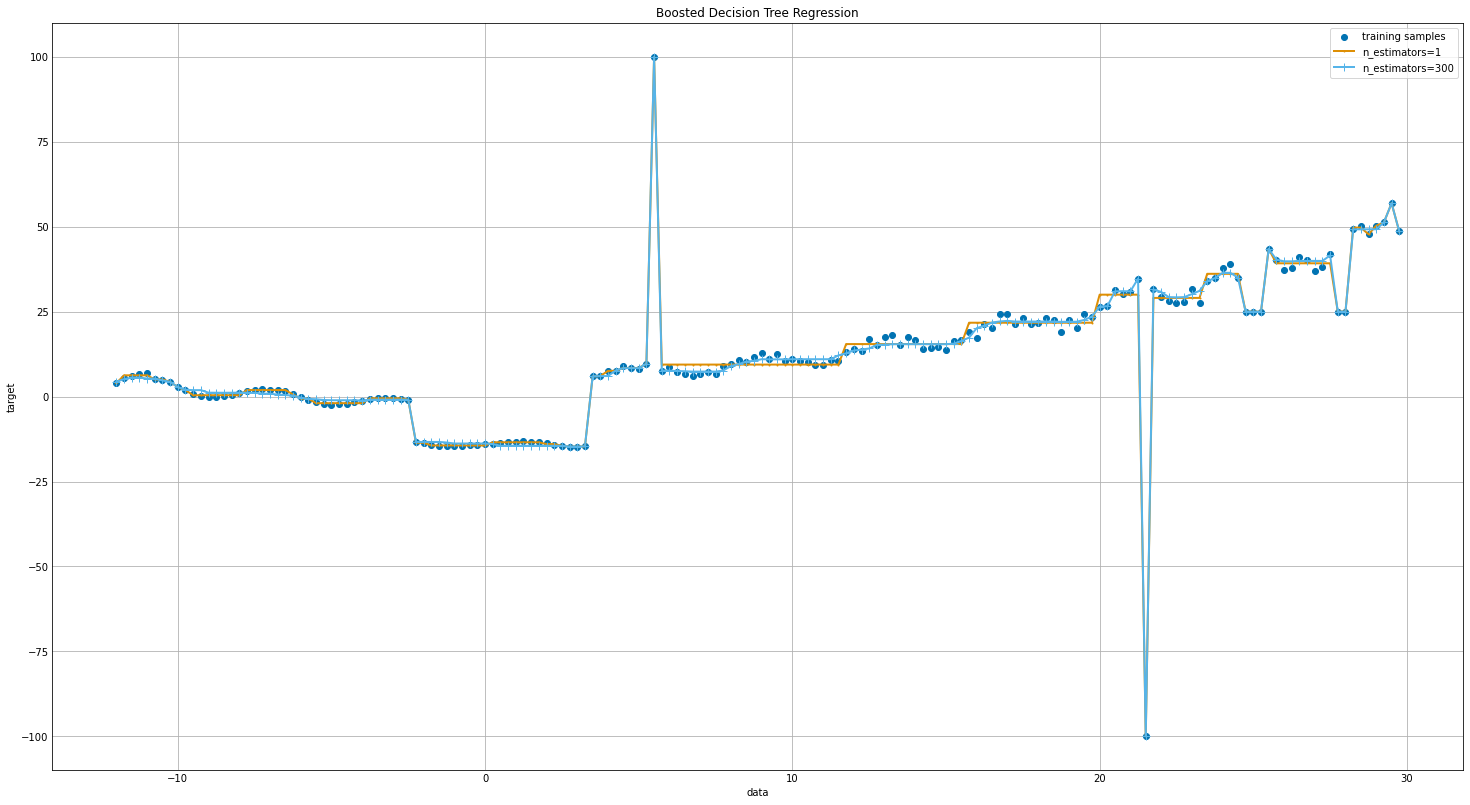

In [19]:


rng = np.random.RandomState(1)
#X = np.array(X_train[:, np.newaxis]) #(np.linspace(0, 6, 100)[:, np.newaxis]
#y = np.array(y_train[:, np.newaxis]) #np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

#X = np.linspace(0, 6, 100)[:, np.newaxis]
#y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

X = td["x-value"]
X = X[:, np.newaxis]
y = td["y-value"]
y = y[:, np.newaxis]

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=6)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=6), n_estimators=35, random_state=rng
)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure(figsize=(20,12))
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2,linestyle ="-",markersize=1,marker="o")
plt.plot(X, y_2, color=colors[9], label="n_estimators=300", linewidth=2,linestyle ="-",markersize=8,marker="+")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [20]:
model.fit(X_train[:, np.newaxis],y_train[:, np.newaxis])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('huberregressor', HuberRegressor())])

In [21]:
model.score(X_train[:, np.newaxis],y_train[:, np.newaxis])

0.45515145412217917

In [22]:
td["y-value"][:,np.newaxis]

array([[ 3.94800000e+00],
       [ 5.59746085e+00],
       [ 6.05575920e+00],
       [ 6.58449068e+00],
       [ 6.84287243e+00],
       [ 5.32804642e+00],
       [ 4.77339721e+00],
       [ 4.36662915e+00],
       [ 2.79000000e+00],
       [ 1.90818286e+00],
       [ 8.74256849e-01],
       [ 3.11634224e-01],
       [-6.70411229e-02],
       [-9.90923012e-02],
       [ 1.54762026e-01],
       [ 6.00855624e-01],
       [ 1.08000000e+00],
       [ 1.68618057e+00],
       [ 2.02907995e+00],
       [ 2.36326783e+00],
       [ 2.08874582e+00],
       [ 1.89638408e+00],
       [ 1.52598037e+00],
       [ 6.35916326e-01],
       [-2.08000000e-01],
       [-9.85788866e-01],
       [-1.49409355e+00],
       [-2.24585478e+00],
       [-2.44769577e+00],
       [-2.24975560e+00],
       [-2.21201299e+00],
       [-1.57199081e+00],
       [-1.30800000e+00],
       [-7.57406847e-01],
       [-4.92773362e-01],
       [-3.00038160e-01],
       [-3.12244923e-01],
       [-5.92383242e-01],
       [-8.8

In [23]:
#===========================================================================================================

In [24]:
from sklearn.ensemble import IsolationForest

X = td["x-value"]
X = X[:, np.newaxis]
y = td["y-value"]
y = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = IsolationForest(max_samples=100, random_state=rng)

model.fit(X_train,y_train)

IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x1EC4BFBAD40)

In [29]:
model.predict(X)
#model.get_params()

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])